<a href="https://colab.research.google.com/github/GeekiAdubea/Wine-Quality---KMeans-Clustering/blob/master/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
project_path = "/content/drive/MyDrive/Colab Notebooks"
project_root = ".."

data_path = os.path.join(project_path,'Wine Data','winequality-red.csv')

wine_df = pd.read_csv(data_path)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()
wine_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

In [5]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

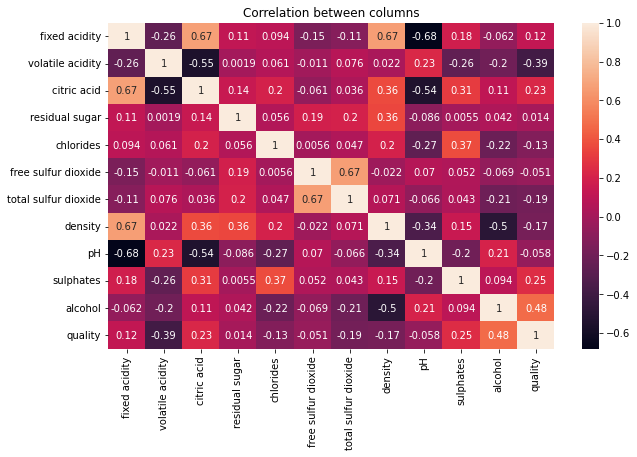

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr(), annot=True)
plt.title("Correlation between columns")
plt.show()

In [7]:
wine_df = wine_df.drop('quality', axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
wine_copy = wine_df.copy()

Scaling data for better model learning

In [9]:
wine_df[wine_df.columns] = MinMaxScaler().fit_transform(wine_df)
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        0.329171          0.279329     0.270976        0.112247   
std         0.154079          0.122644     0.194801        0.096570   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.420000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.125988             0.209506              0.142996     0.490211   
std       0.078573             0.147326              0.116238     0.138571   
min       0.000000             0.000000         

Create a PCA model to reduce data to 2 dimensions

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_df)

In [11]:
scaled_df = pd.DataFrame(pca_result)

In [12]:
#Using Explained Variance Ratio to determine how much information is retained after reducing dimensions with PCA
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.35752287 0.1942533 ]
Cumulative variance explained by 2 principal components: 55.18%


In [13]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca.components_), columns=wine_df.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)

dataset_pca



       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC_1       0.512287           0.22124     0.661097        0.070862   0.071472   
PC_2       0.046458           0.26458     0.235905        0.078240   0.082702   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC_1             0.063738              0.005407  0.329210  0.330387   
PC_2             0.255215              0.261611  0.407754  0.087728   

      sulphates   alcohol  
PC_1   0.129135  0.055974  
PC_2   0.059950  0.740337  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC_1,0.512287,0.22124,0.661097,0.070862,0.071472,0.063738,0.005407,0.329210,0.330387,0.129135,0.055974
PC_2,0.046458,0.26458,0.235905,0.078240,0.082702,0.255215,0.261611,0.407754,0.087728,0.059950,0.740337


In [14]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 fixed acidity    0.512287
citric acid      0.661097
density          0.329210
pH               0.330387
Name: PC_1, dtype: float64


As per PC 2:
 density    0.407754
alcohol    0.740337
Name: PC_2, dtype: float64

******************************************************************


In [15]:
 wcss = list()

 for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init="k-means++", random_state=47)
   kmeans.fit(pca_result)
   wcss.append(kmeans.inertia_)

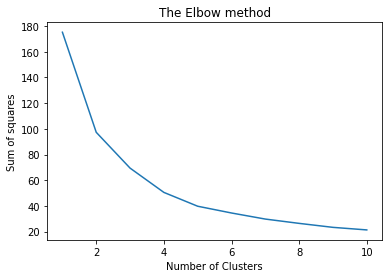

In [16]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squares")
plt.show()

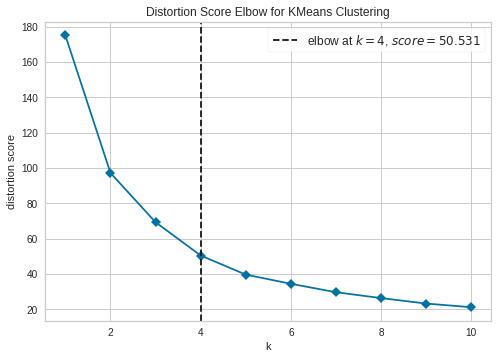

In [17]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings = False)
visualizer.fit(pca_result)
visualizer.show()

Silhouette Method

In [18]:
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(pca_result)
  score = silhouette_score(pca_result, kmeans.labels_)
  print("for cluster: {}, the silhouette score is: {}".format(i,score))

for cluster: 2, the silhouette score is: 0.4136221623532474
for cluster: 3, the silhouette score is: 0.3885824733685818
for cluster: 4, the silhouette score is: 0.3860565943117085
for cluster: 5, the silhouette score is: 0.3777434729619047
for cluster: 6, the silhouette score is: 0.3496278288721186
for cluster: 7, the silhouette score is: 0.3487928934190244
for cluster: 8, the silhouette score is: 0.35078188709012953
for cluster: 9, the silhouette score is: 0.3449958127377306
for cluster: 10, the silhouette score is: 0.34668839427417836


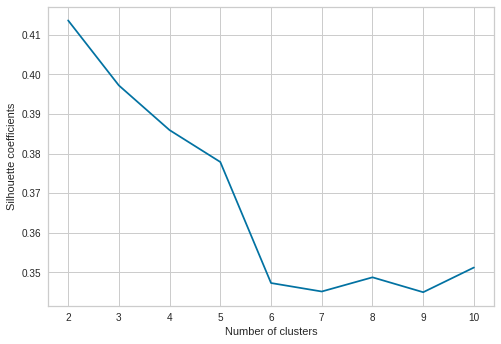

In [19]:
silhouette_coefficients = list()

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(pca_result)
  score = silhouette_score(pca_result, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4, init="k-means++")
label = kmeans.fit_predict(pca_result)
unique_labels = np.unique(label)

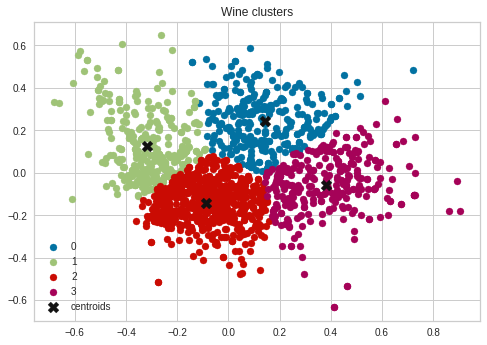

In [21]:
## Plotting clusters on a 2D graph
centroids = kmeans.cluster_centers_ 

for i in unique_labels:
  plt.scatter(pca_result[label==i,0], pca_result[label==i,1],label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.title('Wine clusters')
plt.show()

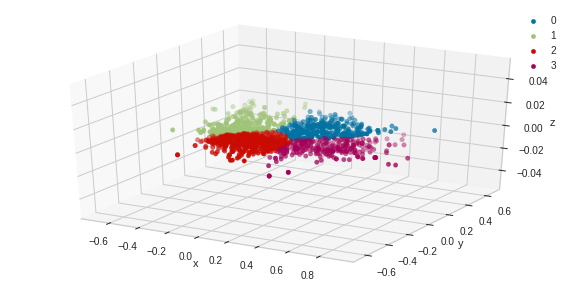

In [22]:
## Plotting clusters on a 3D graph

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
  ax.scatter(pca_result[label ==i,0], pca_result[label==i,1],label = i)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()

In [23]:
Y = pd.DataFrame(label)

In [24]:
Y = Y.reset_index(drop=True) # resetting the index to get uniform index values

df = Y.join(wine_df)  # joining the "product clusters" with the "Description_NLP"

df.rename(columns={0:'Cluster'},inplace=True) # renaming the column

In [25]:
df

,Cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,2,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,2,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,1,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,1,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,1,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [26]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/functions")

In [27]:
import plotting as pt

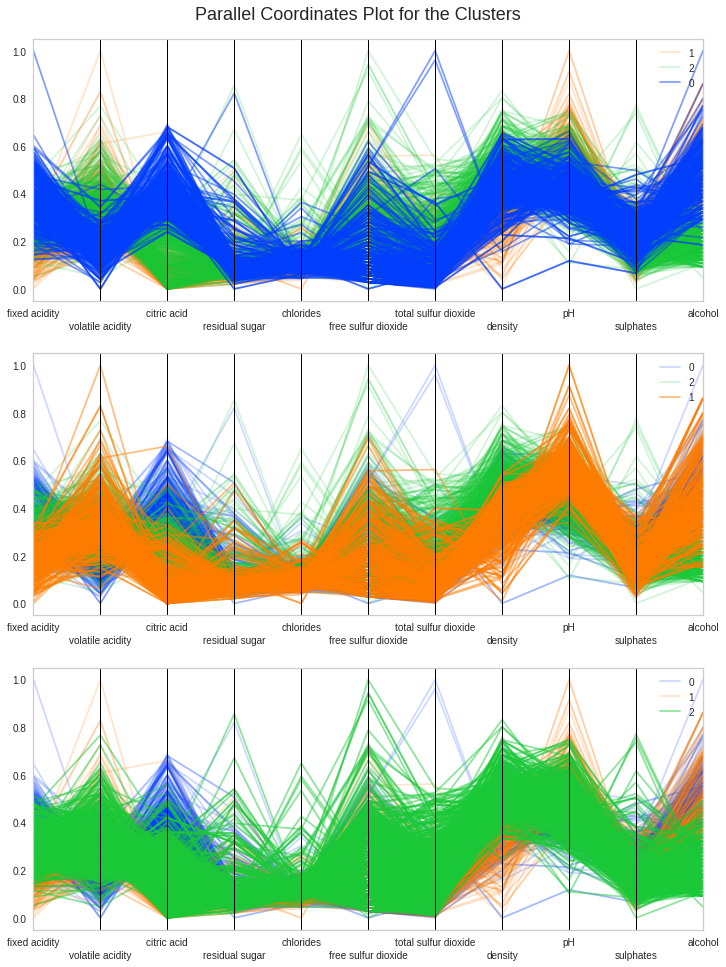

In [28]:
pt.display_parallel_coordinates(df, 3)